In [6]:
import matplotlib.pyplot as plt
import scipy
import numpy
import pandas
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine

#Dimensional Reduction#

Dimensional reduction is the process of finding values that that make it easier to separate the classes. 

For example, a linear or non-linear hiperplane margin. Linear hiperplanes can be defined from an internal product (Hilbert Space) and non-linear hiperplanes from kernel analysis.

##ANOVA##

ANOVA or Analysis of Variance is a feature selection method

Feature selection methods are applyed when some features may not be well distributed therefore reducing the dimensions of the dataset to the best distributed features:

In [7]:
X, Y = load_iris (return_X_y =True)

sampleSize = 5
print("Original Features (4) dimensions:")
print(X[0:sampleSize,:])

# Feature selection methods to obtain the best features for K grouping
from sklearn.feature_selection import SelectKBest, chi2
X_hat = SelectKBest(chi2 , k=2).fit_transform(X, Y)
print("SelectKBest - Best Features (2) dimensions:")
print(X_hat[0:sampleSize,:])

from sklearn.feature_selection import SelectPercentile, chi2
X_hat = SelectPercentile(chi2, percentile=50).fit_transform(X, Y)
print("SelectPercentile - Best Features (2) dimensions:")
print(X_hat[0:sampleSize,:])

# We conclude that the best features for K grouping are 2 and 3

Original Features (4) dimensions:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
SelectKBest - Best Features (2) dimensions:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
SelectPercentile - Best Features (2) dimensions:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


We can apply feature selection to the breast cancer dataset in order to reduce bias:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer();
X, Y = load_breast_cancer(return_X_y =True)

# With feature selection we reduce the features to two (k=2)
X_hat = SelectKBest (chi2 , k=2).fit_transform (X,Y);
X_train, X_test, Y_train, Y_test = train_test_split(X_hat, Y, test_size = 0.8, random_state=0)
Model = GaussianNB();
Model.fit(X_train,Y_train)
Y_hat = Model.predict(X_test);
acc = numpy.mean(Y_hat == Y_test);
print('Bayes Naive Accuracy: %f' %(acc))

Bayes Naive Accuracy: 0.901316


We can apply feature selection to multiple models:

In [9]:
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import NearestCentroid
from sklearn import tree
from sklearn.neural_network import MLPClassifier

data = load_breast_cancer();
X, Y = load_breast_cancer(return_X_y =True)

Models = { 
    'BayesNaive' : GaussianNB(),
    'SVM' : svm.SVC(),
    'KNN': NearestCentroid(),
    'Tree': tree.DecisionTreeClassifier(),
    'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
}

NM = []
PER = []
ACC=[]

for name, model in Models.items():
    for percentile in [5,10,20,30,40,50,60]:
        X_hat = SelectPercentile (chi2 , percentile = percentile).fit_transform (X, Y)
        X_train, X_test, Y_train, Y_test = train_test_split(X_hat, Y, test_size = 0.8, random_state=0)
        model.fit(X_train,Y_train)
        Y_hat = model.predict(X_test)
        acc = numpy.mean(Y_hat == Y_test)
        NM.append(name)
        PER.append(percentile)
        ACC.append(acc)

DF=pandas.DataFrame()
DF=DF.assign(NM=NM)
DF=DF.assign(PER=PER)
DF=DF.assign(ACC=ACC)
DF = DF.nlargest(10,['ACC'])
print(DF)

            NM  PER       ACC
26        Tree   50  0.927632
5   BayesNaive   50  0.921053
6   BayesNaive   60  0.918860
24        Tree   30  0.918860
25        Tree   40  0.918860
4   BayesNaive   40  0.910088
2   BayesNaive   20  0.905702
3   BayesNaive   30  0.905702
7          SVM    5  0.903509
0   BayesNaive    5  0.901316


## PCA ##

Principal Component Analysis is a method to determine an orthogonal proyection space for optimal grouping.

With this method we can visualize data in a space grater than 2 dimensions.

(569, 30)
(569, 2)


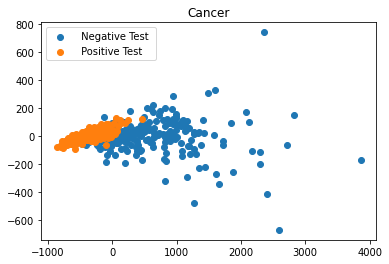

In [15]:
X, Y = load_breast_cancer (return_X_y =True)

pca = PCA( n_components = 2 )
pca.fit(X)
X_hat = pca.transform(X)
print (X.shape)
print (X_hat.shape)

plt.scatter (X_hat[Y == 0,0], X_hat [Y == 0,1], label =" Negative Test ")
plt.scatter (X_hat[Y == 1,0], X_hat [Y == 1,1], label =" Positive Test ")
plt.title("Cancer")
plt.legend (loc="upper left");
plt.show ()

(150, 4)
(150, 2)


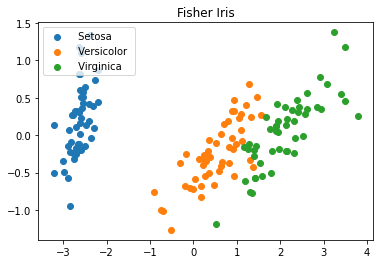

In [16]:
X, Y = load_iris( return_X_y =True)

pca = PCA( n_components = 2 )
pca.fit(X)
X_hat = pca.transform(X)
print (X.shape)
print (X_hat.shape)

plt.scatter (X_hat[Y == 0,0], X_hat [Y == 0,1],label =" Setosa ")
plt.scatter (X_hat[Y == 1,0], X_hat [Y == 1,1],label =" Versicolor ")
plt.scatter (X_hat[Y == 2,0], X_hat [Y == 2,1],label =" Virginica ")
plt.title("Fisher Iris")
plt.legend (loc="upper left")
plt.show ()

(178, 13)
(178, 2)


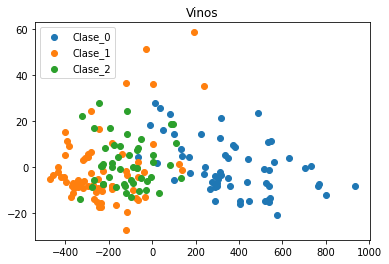

In [17]:
X, Y = load_wine( return_X_y =True)

pca = PCA( n_components = 2 )
pca.fit(X)
X_hat = pca.transform(X)
print (X.shape)
print (X_hat.shape)

for k in range(3):
    plt.scatter(X_hat[Y == k,0], X_hat [Y == k,1],label ="Clase_" + str(k))
plt.title("Vinos")
plt.legend (loc="upper left")
plt.show ()